In [18]:
# Generate non-affine data transformations
import numpy as np
from scipy.misc import imread
from skimage import data, segmentation, color
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

In [19]:
LOCALIZER_DATA_DIR = '/a/data/fisheries_monitoring/data/localizers/'
BOX_FILE = LOCALIZER_DATA_DIR + 'original/boxes.csv'
CROPPED_IMG_DIR = '/a/data/fisheries_monitoring/data/classifiers/cropped_from_origin/'

(720, 1280)


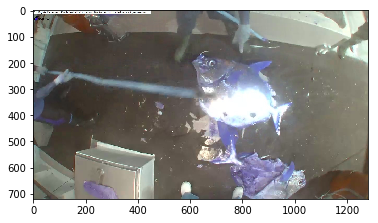

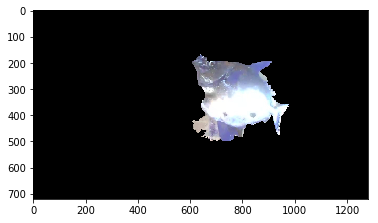

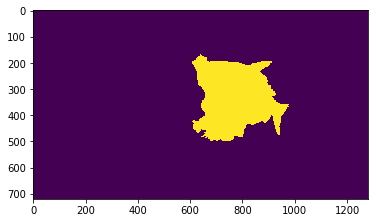

In [34]:
f_img = LOCALIZER_DATA_DIR + 'original/LAG/img_07919.jpg'
#img = np.array(imread(f_img))
img = cv2.imread(f_img)
img2 = img.copy()
mask = np.zeros(img.shape[:2],dtype = np.uint8)
rect = (601,156,381,344)
bgdmodel = np.zeros((1,65),np.float64)
fgdmodel = np.zeros((1,65),np.float64)
cv2.grabCut(img, mask, rect, bgdmodel, fgdmodel, 3, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==1) + (mask==3),255,0).astype('uint8')
output = cv2.bitwise_and(img2,img2,mask=mask2)
print mask.shape
plt.imshow(img2)
plt.show()
plt.imshow(output)
plt.show()
plt.imshow(mask == 3)
plt.show()

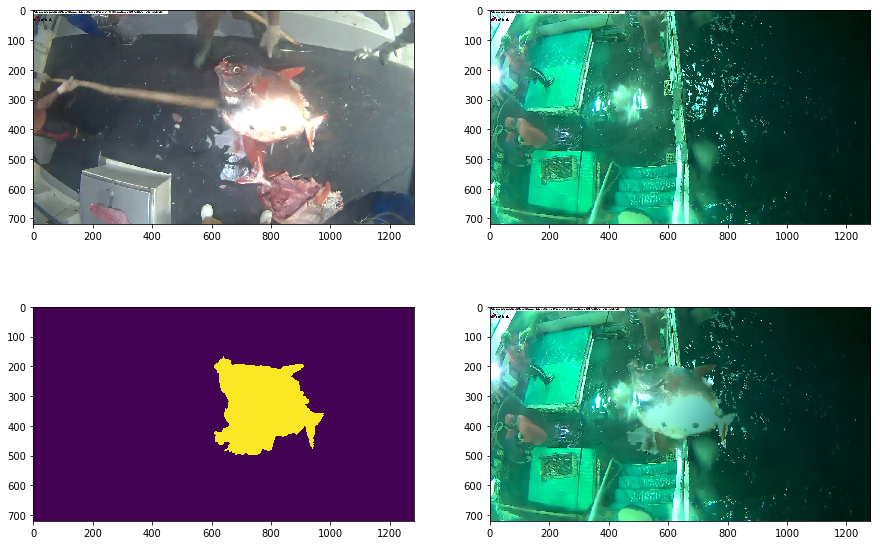

In [57]:
from pblend import blend
img_source = np.array(imread(LOCALIZER_DATA_DIR + 'original/LAG/img_07919.jpg'))
img_target = np.array(imread(LOCALIZER_DATA_DIR + 'original/NoF/img_02381.jpg'))
img_target_orig = img_target.copy()
img_mask = mask == 3
img_result = pblend.blend(img_target, img_source, img_mask, offset=(0,-150))
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(2,2,1)
ax.imshow(img_source)
ax = fig.add_subplot(2,2,2)
ax.imshow(img_target_orig)
ax = fig.add_subplot(2,2,3)
ax.imshow(img_mask)
ax = fig.add_subplot(2,2,4)
ax.imshow(img_result)
plt.show()